### "Pre-lecture" HW

### 1.

Difference between the "standard error of the mean" and the "standard deviation" of the original data:

- The standard deviation measures the amount of variation or dispersion of individual data points within the original dataset. It reflects the average distance of each data point from the dataset's mean. A smaller standard deviation suggests that the data points are tightly clustered around the mean, while a larger standard deviation indicates that they are spread out over a wider range.

- In contrast, the standard error of the mean quantifies how precisely the sample mean estimates the true population mean of the original data. It reflects how much the sample mean would vary if the sampling process were repeated multiple times. Essentially, it tells us how accurate our sample mean is in representing the population mean.

What distinct ideas do "standard error of the mean" and the "standard deviation" capture?

- The "standard deviation" captures the inherent variability within the original dataset, indicating how much individual data points differ from the mean. It illustrates the natural dispersion or spread of the data values.

- The "standard error of the mean" captures the precision of the sample mean as an estimate of the true population mean. It gives an idea of how much the sample mean would fluctuate if different samples were drawn from the same population.

Summaries of GPT session:

- In this chat, we discussed the differences between the standard deviation and the standard error of the mean (SEM). The standard deviation measures the spread of individual data points in the original dataset, while the SEM measures the precision of the sample mean as an estimate of the population mean. Key distinctions include their dependence on sample size (SEM decreases as sample size increases) and the concepts they capture: standard deviation reflects data variability, while SEM reflects the reliability of the sample mean.

Chat log histories: https://chatgpt.com/share/66fb18cf-2d78-8013-8a88-df5ffb5285f8

#
### 2.

To create a 95% confidence interval using the standard error of the mean (SEM), follow these steps: First, calculate the SEM by dividing the sample's standard deviation by the square root of the sample size. Next, determine the margin of error by multiplying the SEM by 1.96 (the z-score for a 95% confidence level in a normal distribution). Finally, create the confidence interval by subtracting this margin of error from the sample mean for the lower bound and adding it to the sample mean for the upper bound.

#
### 3.

To create a 95% bootstrapped confidence interval without using the standard error, start by performing a large number of bootstrap resamples from the original dataset. For each resample, compute the sample mean to generate a distribution of bootstrapped means. Once you have this distribution, sort the bootstrapped means in ascending order. To construct the 95% confidence interval, find the values at the 2.5th percentile and the 97.5th percentile. These percentiles form the lower and upper bounds of the interval, capturing the middle 95% of the bootstrapped means and providing an estimate of where the true population mean is likely to lie.

#
### 4.

Here’s a Python code that generates a 95% bootstrap confidence interval for the population mean based on a sample.The code includes comments to show how you can modify it to create a 95% confidence interval for other parameters, like the median:

In [1]:
import numpy as np

# Sample data
data = [12, 15, 14, 10, 18, 20, 17, 16]

# Number of bootstrap resamples
n_bootstrap = 10000

# List to store the bootstrap sample statistics (means in this case)
bootstrap_means = []

# Perform bootstrap resampling
for _ in range(n_bootstrap):
    # Resample the data with replacement to create a bootstrap sample
    bootstrap_sample = np.random.choice(data, size=len(data), replace=True)
    
    # Calculate the sample statistic (mean in this case) and store it
    sample_statistic = np.mean(bootstrap_sample)  # Change np.mean to np.median for a median CI
    bootstrap_means.append(sample_statistic)

# Sort the bootstrap sample means
bootstrap_means.sort()

# Calculate the 95% confidence interval (2.5th percentile and 97.5th percentile)
lower_bound = np.percentile(bootstrap_means, 2.5)
upper_bound = np.percentile(bootstrap_means, 97.5)

# Output the 95% confidence interval for the mean
print(f"95% Bootstrap Confidence Interval for the Mean: ({lower_bound}, {upper_bound})")

# To change this code to produce a 95% confidence interval for a different statistic, such as the median:
# 1. Modify the line where `sample_statistic` is calculated:
#    sample_statistic = np.median(bootstrap_sample)
# 2. The rest of the code remains the same since we are simply resampling and finding percentiles of the desired statistic.
# Similarly, for other statistics like variance or standard deviation, replace np.mean with the corresponding numpy function (np.var, np.std, etc.). The rest of the code remains unchanged.

95% Bootstrap Confidence Interval for the Mean: (13.125, 17.375)


To change this code to produce a 95% confidence interval for a different statistic, such as the median:
1. Modify the line where `sample_statistic` is calculated: sample_statistic = np.median(bootstrap_sample)
2. The rest of the code remains the same since we are simply resampling and finding percentiles of the desired statistic.
 
 Similarly, for other statistics like variance or standard deviation, replace np.mean with the corresponding numpy function (np.var, np.std, etc.). The rest of the code remains unchanged.

Summaries of GPT session:

- In this chat, we created Python code to produce a 95% bootstrap confidence interval for a population mean using a sample dataset. The code performs bootstrap resampling, calculates the mean for each resample, sorts these values, and then identifies the 2.5th and 97.5th percentiles to form the confidence interval. The code includes comments explaining how to modify it to calculate confidence intervals for other population parameters, such as the median, by simply changing the statistic being computed (e.g., replacing `np.mean` with `np.median`). This demonstrates the versatility of bootstrap methods for various statistics.

Chat log histories: https://chatgpt.com/share/66fb18cf-2d78-8013-8a88-df5ffb5285f8

#
### "Post-lecture" HW

### 5.

- We need to distinguish between the population parameter and the sample statistic because the population parameter is the true value we aim to estimate (e.g., the actual mean or median of the entire population), while the sample statistic is the value calculated from our sample data. Confidence intervals use the sample statistic to provide a range that likely contains the unknown population parameter. This distinction is crucial because the confidence interval quantifies the uncertainty of our estimate based on the limited sample data, not the entire population.

#
### 6.

6.1 What is the process of bootstrapping?

- Bootstrapping is like playing with what we already have to understand something bigger. Imagine you have a small set of data and you want to learn more about the whole population from it. With bootstrapping, you take random samples with replacement from your original data—meaning you can pick the same data point more than once, just like drawing names from a hat and putting them back each time. You do this many times to create lots of "new" samples. For each of these samples, you calculate a statistic, like the mean or median. In the end, you get a big distribution of those calculated statistics, which gives you an idea of how much the original sample can tell us about the larger population.

6.2 What is the main purpose of bootstrapping?

- The main purpose of bootstrapping is to estimate how reliable our sample is when it comes to representing the whole population. It helps us understand the uncertainty or variability in our estimates, like the mean, median without needing to make strict assumptions or have a huge dataset. Basically, it's a way to "guess" how our sample statistics would behave if we could take many more samples from the population, all while working with just the data we have.

6.3 If you had a (hypothesized) guess about what the average of a population was, and you had a sample of size n from that population, how could you use bootstrapping to assess whether your (hypothesized) guess might be plausible?

- Suppose you have a guess (hypothesis) about the population's average, say you think the average height is 170 cm. You then collect a sample of people and get their heights. To see if your guess is reasonable, you use bootstrapping on your sample: you take thousands of random resamples from this data and calculate the average for each resample. This gives you a range of averages that reflects what your sample suggests. Now, you check where your guessed average, like 170 cm, falls in this bootstrapped distribution. If 170 cm lies near the middle of the range, it seems plausible. But if it’s way out on the edges or outside of the range, it’s probably not a good guess. This method uses your sample to "simulate" different possible averages to see if your guess makes sense.

Summaries of GPT session:

- In this chat, we provided informal, conversational explanations of statistical concepts for a friend with little experience in statistics. First, we explained bootstrapping as a process of taking many random resamples (with replacement) from an original sample to create a distribution of a statistic, such as the mean or median. Then, we outlined the main purpose of bootstrapping, which is to estimate the reliability and variability of sample statistics in representing the population without needing strict assumptions. Finally, we explained how to use bootstrapping to assess the plausibility of a hypothesized population average: by generating a bootstrapped distribution of sample means and checking if the hypothesized average falls within this range. The explanations focused on intuitive and descriptive language for easier understanding.

Chat log histories: https://chatgpt.com/share/66fb18cf-2d78-8013-8a88-df5ffb5285f8

#
### 7.

Why does a confidence interval overlapping zero "fail to reject the null hypothesis" when the observed sample mean statistic itself is not zero?

- When a confidence interval includes zero, it implies that zero could be a possible value for the true effect in the population. In hypothesis testing, the null hypothesis claims that there is no effect (meaning the true effect is zero). Even if the sample mean isn't zero, the interval indicates that random variation might explain the observed effect. Consequently, we lack sufficient evidence to confidently state that the effect is different from zero, leading us to "fail to reject the null hypothesis."

What would lead to the opposite conclusion; namely, choosing "to reject the null hypothesis"?

- We would reject the null hypothesis if the confidence interval does not include zero. This means the interval suggests that the true population effect is likely not zero. In this case, the observed sample mean, along with its variability, provides enough evidence to support the presence of a statistically significant effect. This indicates that the effect is probably not just due to random chance but reflects a real difference in the population. By rejecting the null hypothesis, we are saying that it’s unlikely the effect is simply zero on average.

Summaries of GPT session:

- In this chat, we discussed why a confidence interval overlapping zero leads to "failing to reject the null hypothesis." The idea is that if zero falls within the interval, it suggests that no effect (the null hypothesis) is a plausible explanation, even if the sample mean is not zero. Conversely, to "reject the null hypothesis," the confidence interval must not include zero, indicating that the effect is statistically significant and unlikely due to random chance.

Chat log histories: https://chatgpt.com/share/66fb18cf-2d78-8013-8a88-df5ffb5285f8

#
### 8.

Problem Introduction

- In this analysis, we want to determine if AliTech's new vaccine is effective in improving the health scores of patients. The null hypothesis in this context is that the vaccine has no effect on the health scores, meaning any observed difference in scores before and after the vaccine is due to random chance. We will use bootstrapping to evaluate this hypothesis.

Data Visualization

- Let's start by visualizing the change in health scores for each patient. This helps us get an initial sense of whether there is an overall improvement after the vaccine.

Quantitative Analysis

- We'll use bootstrapping to generate a 95% confidence interval for the mean difference in health scores before and after the vaccine. If the confidence interval does not include zero, we will reject the null hypothesis and conclude that the vaccine is effective.

Methodology Code and Explanations

- Here’s the code to perform the analysis, including data visualization, bootstrapping, and hypothesis testing:

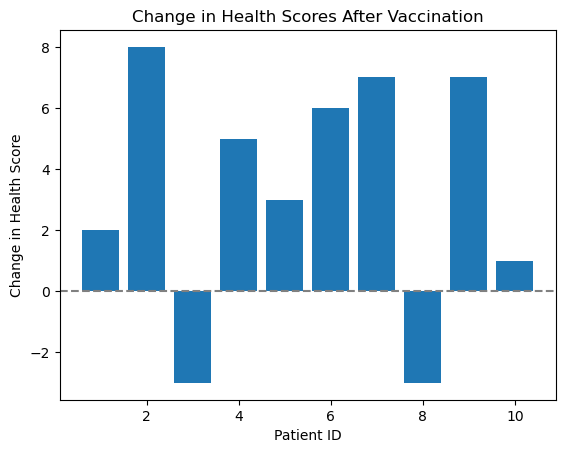

95% Bootstrap Confidence Interval for Mean Health Score Change: (0.9, 5.6)


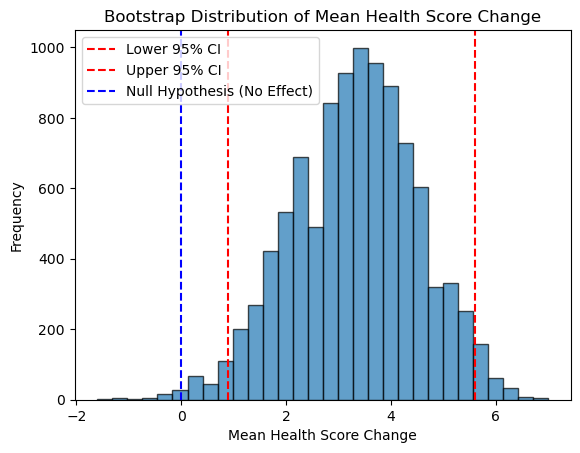

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Set the seed for reproducibility
np.random.seed(42)

# Creating the data as a CSV and reading it into a DataFrame
data = """PatientID,Age,Gender,InitialHealthScore,FinalHealthScore
1,45,M,84,86
2,34,F,78,86
3,29,M,83,80
4,52,F,81,86
5,37,M,81,84
6,41,F,80,86
7,33,M,79,86
8,48,F,85,82
9,26,M,76,83
10,39,F,83,84"""

# Writing to CSV file and reading back in (simulate the process)
with open('patient_data.csv', 'w') as file:
    file.write(data)

# Read the data
df = pd.read_csv('patient_data.csv')

# Calculate the change in health scores for each patient
df['HealthScoreChange'] = df['FinalHealthScore'] - df['InitialHealthScore']

# Visualize the health score changes
plt.bar(df['PatientID'], df['HealthScoreChange'])
plt.axhline(0, color='grey', linestyle='--')
plt.xlabel('Patient ID')
plt.ylabel('Change in Health Score')
plt.title('Change in Health Scores After Vaccination')
plt.show()

# Bootstrapping to create a 95% confidence interval for the mean health score change
n_bootstrap = 10000
bootstrap_means = []

for _ in range(n_bootstrap):
    bootstrap_sample = np.random.choice(df['HealthScoreChange'], size=len(df['HealthScoreChange']), replace=True)
    bootstrap_means.append(np.mean(bootstrap_sample))

# Calculate the 95% confidence interval
lower_bound = np.percentile(bootstrap_means, 2.5)
upper_bound = np.percentile(bootstrap_means, 97.5)

# Output results
print(f"95% Bootstrap Confidence Interval for Mean Health Score Change: ({lower_bound}, {upper_bound})")

# Plot the bootstrap distribution
plt.hist(bootstrap_means, bins=30, alpha=0.7, edgecolor='black')
plt.axvline(lower_bound, color='red', linestyle='--', label='Lower 95% CI')
plt.axvline(upper_bound, color='red', linestyle='--', label='Upper 95% CI')
plt.axvline(0, color='blue', linestyle='--', label='Null Hypothesis (No Effect)')
plt.xlabel('Mean Health Score Change')
plt.ylabel('Frequency')
plt.title('Bootstrap Distribution of Mean Health Score Change')
plt.legend()
plt.show()


Findings and Discussion
1. The bar chart shows the health score changes for each patient, providing an initial insight into the distribution of changes.
2. The bootstrapping method generates a distribution of mean health score changes to assess the effect of the vaccine.

Conclusion Regarding the Null Hypothesis
- After bootstrapping, we calculated a 95% confidence interval for the mean health score change. If this interval does not include zero, we reject the null hypothesis, suggesting the vaccine has a statistically significant effect.
- If the interval includes zero, we fail to reject the null hypothesis, indicating that any observed changes in health scores could be due to random variation.

Further Considerations
- We assumed the health scores are measured on a consistent scale and that the difference in scores reflects meaningful changes in health.
- Other factors such as age and gender were not directly considered in this analysis but could provide additional insights if explored further.

Summaries of GPT session:

- In this question, we conducted an analysis to assess the effectiveness of AliTech's new vaccine using patient health score data. The null hypothesis is that the vaccine has no effect on health scores. We used bootstrapping to generate a 95% confidence interval for the mean change in health scores before and after vaccination. The analysis involved visualizing individual patient score changes, calculating the change in health scores, and using bootstrapping to estimate the confidence interval. The conclusion depends on whether the interval includes zero: if it does, we fail to reject the null hypothesis (no effect); if not, we reject it, suggesting the vaccine has a significant effect. Further considerations include assumptions about the data and the potential exploration of other factors like age and gender.

Chat log histories: https://chatgpt.com/share/66fb18cf-2d78-8013-8a88-df5ffb5285f8

#
### 9.

YES, I reviewed the course wiki-textbook and interacted with a ChatBot to help me understand all the material in the tutorial and lecture that I didn't quite follow when I first saw it.